In [254]:
%run utils.ipynb

In [253]:
import pandas as pd
import numpy as np
import os
import sys
# from utils import *
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
import sklearn
from sklearn.svm import OneClassSVM
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_extraction import DictVectorizer

In [252]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, Dropout, Activation, Input, Embedding, TextVectorization, Reshape, Add, Concatenate, Flatten
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

In [8]:
TRAIN = 5000
SEG_SIZE = 100
TRAIN_SEG = round(TRAIN / SEG_SIZE)
LABELED_USERS = 10
EMBEDDING_DIM = 128

In [14]:
_, seg_df = load_user_data()
print(seg_df.shape)
y = pd.read_csv('challengeToFill.csv').drop(columns=['Unnamed: 0']).T.reset_index(drop=True).T
y_train = y.iloc[:LABELED_USERS, :TRAIN_SEG]
y_test = y.iloc[:LABELED_USERS, TRAIN_SEG:]
train_df = seg_df.iloc[:, :TRAIN_SEG]
test_df = seg_df.iloc[:LABELED_USERS, TRAIN_SEG:]
submission_df = seg_df.iloc[LABELED_USERS:, TRAIN_SEG:]
sentences = train_df.to_numpy().flatten().tolist()
embedding_model = create_embeddings(sentences, vector_size=EMBEDDING_DIM, window=5)
print(embedding_model.wv)
print(train_df.shape)
print(test_df.shape)

(40, 150)
FastTextKeyedVectors<vector_size=128, 228 keys>
(40, 50)
(10, 100)


In [18]:
# train = np.vstack(train_df.applymap(embedding_model.wv.get_sentence_vector).to_numpy().reshape(-1, 1).tolist())
# test = np.vstack(test_df.applymap(embedding_model.wv.get_sentence_vector).to_numpy().reshape(-1, 1).tolist())

# print(train.shape)
# print(test.shape)

In [20]:
s = pd.Series(train_df.to_numpy().flatten())
X_train = pd.DataFrame.from_dict(dict(zip(s.index, s.values))).T
X_train

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,cat,nawk,nawk,uname,pwd,echo,echo,ksh,uname,stty,...,sh,sh,xgvis,ln,sh,sh,sh,xgvis,sh,sh
1,nawk,nawk,uname,pwd,echo,echo,ksh,uname,stty,tset,...,sh,xgvis,ln,sh,sh,sh,xgvis,sh,sh,xgvis
2,nawk,uname,pwd,echo,echo,ksh,uname,stty,tset,ksh,...,xgvis,ln,sh,sh,sh,xgvis,sh,sh,xgvis,ls
3,uname,pwd,echo,echo,ksh,uname,stty,tset,ksh,movemail,...,ln,sh,sh,sh,xgvis,sh,sh,xgvis,ls,ls
4,pwd,echo,echo,ksh,uname,stty,tset,ksh,movemail,movemail,...,sh,sh,sh,xgvis,sh,sh,xgvis,ls,ls,sh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,hostname,id,nawk,getopt,true,true,grep,date,lp,find,...,netscape,netscape,netscape,netscape,sh,sh,mimencod,sh,rm,sh
1996,id,nawk,getopt,true,true,grep,date,lp,find,expr,...,netscape,netscape,netscape,sh,sh,mimencod,sh,rm,sh,MediaMai
1997,nawk,getopt,true,true,grep,date,lp,find,expr,generic,...,netscape,netscape,sh,sh,mimencod,sh,rm,sh,MediaMai,netscape
1998,getopt,true,true,grep,date,lp,find,expr,generic,mp,...,netscape,sh,sh,mimencod,sh,rm,sh,MediaMai,netscape,netscape


In [38]:
d = {k: idx for idx, k in enumerate(np.unique(X_train))}
print(d)

{'.xinitrc': 0, '.xsessio': 1, '4Dwm': 2, '9term': 3, 'FIFO': 4, 'LOCK': 5, 'Mail': 6, 'MediaMai': 7, 'Sqpe': 8, 'UNLOCK': 9, 'W': 10, 'Xsession': 11, '[': 12, 'a.out': 13, 'acroread': 14, 'ama.chec': 15, 'appdefpa': 16, 'arch': 17, 'as1': 18, 'awk': 19, 'basename': 20, 'bash': 21, 'bc': 22, 'be': 23, 'bindkey': 24, 'cal': 25, 'call_fil': 26, 'cat': 27, 'cfe': 28, 'chmod': 29, 'col': 30, 'cpio': 31, 'cpp': 32, 'csh': 33, 'cut': 34, 'cxwsh': 35, 'date': 36, 'deroff': 37, 'detail_o': 38, 'dirname': 39, 'download': 40, 'dpost': 41, 'driver': 42, 'du': 43, 'dvips': 44, 'echo': 45, 'ed': 46, 'edg_prel': 47, 'egrep': 48, 'elm': 49, 'emacs-20': 50, 'endsessi': 51, 'env': 52, 'eqn': 53, 'ex': 54, 'expr': 55, 'exrecove': 56, 'faces': 57, 'fecc': 58, 'field': 59, 'file': 60, 'find': 61, 'findobj': 62, 'finger': 63, 'fish2': 64, 'flock': 65, 'fmt': 66, 'format.d': 67, 'ftp': 68, 'ftp.orig': 69, 'gawk': 70, 'generic': 71, 'gethost': 72, 'getopt': 73, 'getpgrp': 74, 'gettxt': 75, 'ghostvie': 76, 'g

In [32]:
ohe = OneHotEncoder()
ohe.fit_transform(X_train)

<2000x16962 sparse matrix of type '<class 'numpy.float64'>'
	with 200000 stored elements in Compressed Sparse Row format>

In [27]:
pd.DataFrame.sparse.from_spmatrix(ohe.fit_transform(X_train))

,0,1,2,3,4,5,6,7,8,9,...,16952,16953,16954,16955,16956,16957,16958,16959,16960,16961
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [207]:
# vectorize_layer = TextVectorization(output_mode='int')
# vectorize_layer.adapt(text_dataset.batch(64))

In [206]:
HIDDEN_DIM = 128

In [162]:
def build_encoder():
    model = Sequential()
    model.add(Input(shape=(SEG_SIZE,)))
    # model.add(vectorize_layer)
    model.add(Embedding(vectorize_layer.vocabulary_size(), EMBEDDING_DIM))
    model.add(LSTM(HIDDEN_DIM, return_sequences=True))
    # model.add(Dense(32))
    # model.add(Dense(1))
    return model

In [163]:
s = pd.Series(train_df.to_numpy().flatten()).apply(lambda x: ' '.join(x)).values.reshape(-1, 1).tolist()
text_dataset = tf.data.Dataset.from_tensor_slices(s)
vectorize_layer = TextVectorization(output_mode='int', output_sequence_length=SEG_SIZE)
vectorize_layer.adapt(text_dataset.batch(64))

In [164]:
encoder = build_encoder()
encoder.summary()

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, 100, 128)          29056     
_________________________________________________________________
lstm_18 (LSTM)               (None, 100, 64)           49408     
Total params: 78,464
Trainable params: 78,464
Non-trainable params: 0
_________________________________________________________________


In [165]:
def build_decoder():
    model = Sequential()
    model.add(Input(shape=(SEG_SIZE, HIDDEN_DIM,)))
    model.add(Dense(32))
    model.add(Dense(1))
    model.add(Flatten())
    return model

In [166]:
decoder = build_decoder()
decoder.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 100, 32)           2080      
_________________________________________________________________
dense_41 (Dense)             (None, 100, 1)            33        
_________________________________________________________________
flatten_6 (Flatten)          (None, 100)               0         
Total params: 2,113
Trainable params: 2,113
Non-trainable params: 0
_________________________________________________________________


In [167]:
autoencoder = Sequential()
autoencoder.add(encoder)
autoencoder.add(decoder)
autoencoder.compile(loss='mae', optimizer='adam', metrics='mae')
autoencoder.summary()

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_40 (Sequential)   (None, 100, 64)           78464     
_________________________________________________________________
sequential_41 (Sequential)   (None, 100)               2113      
Total params: 80,577
Trainable params: 80,577
Non-trainable params: 0
_________________________________________________________________


In [208]:
def build_autoencoder():
    model = Sequential()
    model.add(Input(shape=(SEG_SIZE)))
    model.add(Embedding(vectorize_layer.vocabulary_size(), EMBEDDING_DIM))
    model.add(LSTM(HIDDEN_DIM, return_sequences=True))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(32))
    model.add(Dense(1))
    model.add(Flatten())
    return model

In [209]:
autoencoder = build_autoencoder()
autoencoder.compile(loss='mae', optimizer='adam', metrics='mae')
autoencoder.summary()

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_26 (Embedding)     (None, 100, 128)          29056     
_________________________________________________________________
lstm_26 (LSTM)               (None, 100, 128)          131584    
_________________________________________________________________
dense_54 (Dense)             (None, 100, 64)           8256      
_________________________________________________________________
dropout (Dropout)            (None, 100, 64)           0         
_________________________________________________________________
dense_55 (Dense)             (None, 100, 32)           2080      
_________________________________________________________________
dense_56 (Dense)             (None, 100, 1)            33        
_________________________________________________________________
flatten_13 (Flatten)         (None, 100)             

In [210]:
train = vectorize_layer(s)

In [286]:
cp = ModelCheckpoint('model.h5', save_best_only=True, verbose=1, save_weights_only=True)
es = EarlyStopping(monitor="val_loss", patience=5, mode="min", verbose=1)
rlop = ReduceLROnPlateau(patience=3, verbose=2)
callbacks = [cp, es, rlop]

In [212]:
history = autoencoder.fit(train, train, batch_size=32, epochs=20, validation_split=0.1, callbacks=callbacks)

Epoch 1/20
57/57 [==============================] - 8s 90ms/step - loss: 27.3506 - mae: 27.3506 - val_loss: 23.8329 - val_mae: 23.8329

Epoch 00001: val_loss improved from inf to 23.83287, saving model to model.h5
Epoch 2/20
57/57 [==============================] - 7s 118ms/step - loss: 18.0095 - mae: 18.0095 - val_loss: 9.3917 - val_mae: 9.3917

Epoch 00002: val_loss improved from 23.83287 to 9.39174, saving model to model.h5
Epoch 3/20
57/57 [==============================] - 8s 135ms/step - loss: 4.6389 - mae: 4.6389 - val_loss: 6.0074 - val_mae: 6.0074

Epoch 00003: val_loss improved from 9.39174 to 6.00743, saving model to model.h5
Epoch 4/20
57/57 [==============================] - 8s 135ms/step - loss: 2.6112 - mae: 2.6112 - val_loss: 5.4003 - val_mae: 5.4003

Epoch 00004: val_loss improved from 6.00743 to 5.40035, saving model to model.h5
Epoch 5/20
57/57 [==============================] - 8s 143ms/step - loss: 2.2325 - mae: 2.2325 - val_loss: 4.9590 - val_mae: 4.9590

Epoch 00

In [293]:
# create a model by subclassing Model class in tensorflow
class AutoEncoder(Model):
    
    """
    Parameters
    ----------
    output_units: int
    Number of output units

    code_size: int
    Number of units in bottle neck
    """

    def __init__(self, output_units, hidden_dim=32, code_size=8):
        super().__init__()
        self.encoder = Sequential([
            # Embedding(vectorize_layer.vocabulary_size(), EMBEDDING_DIM),
            # LSTM(hidden_dim, return_sequences=True, dropout=0.5),
            Dense(hidden_dim//2, activation='relu'),
            Dropout(0.4),
            Dense(hidden_dim//4, activation='relu'),
            # Dropout(0.1),
            # Dense(16, activation='relu'),
            # Dropout(0.1),
            # Dense(code_size, activation='relu')
            ])
        
        self.decoder = Sequential([
            Dense(hidden_dim//4, activation='relu'),
            Dropout(0.3),
            Dense(hidden_dim//2, activation='relu'),
            Dropout(0.4),
            Dense(hidden_dim, activation='relu'),
            Dropout(0.5),
            Dense(output_units, activation='relu'),
            Flatten()
    ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded

In [294]:
model = AutoEncoder(output_units=1)
# configurations of model
model.compile(loss='mae', metrics=['mae'], optimizer='adam')
model.build(input_shape=(None, SEG_SIZE))
model.summary()

Model: "auto_encoder_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_83 (Sequential)   (None, 8)                 1752      
_________________________________________________________________
sequential_84 (Sequential)   (None, 1)                 793       
Total params: 2,545
Trainable params: 2,545
Non-trainable params: 0
_________________________________________________________________


In [297]:
history = model.fit(
    train,
    train,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    # callbacks= callbacks
    # validation_data=(x_test_scaled, x_test_scaled)
)

Epoch 1/50
13/13 [==============================] - 0s 9ms/step - loss: 26.9352 - mae: 26.9352 - val_loss: 26.7900 - val_mae: 26.7900
Epoch 2/50
13/13 [==============================] - 0s 7ms/step - loss: 27.1409 - mae: 27.1409 - val_loss: 26.7892 - val_mae: 26.7892
Epoch 3/50
13/13 [==============================] - 0s 7ms/step - loss: 27.0837 - mae: 27.0837 - val_loss: 26.7909 - val_mae: 26.7909
Epoch 4/50
13/13 [==============================] - 0s 6ms/step - loss: 27.0886 - mae: 27.0886 - val_loss: 26.7916 - val_mae: 26.7916
Epoch 5/50
13/13 [==============================] - 0s 7ms/step - loss: 26.9276 - mae: 26.9276 - val_loss: 26.7930 - val_mae: 26.7930
Epoch 6/50
13/13 [==============================] - 0s 6ms/step - loss: 27.0459 - mae: 27.0459 - val_loss: 26.7969 - val_mae: 26.7969
Epoch 7/50
13/13 [==============================] - 0s 6ms/step - loss: 27.0346 - mae: 27.0346 - val_loss: 26.7965 - val_mae: 26.7965
Epoch 8/50
13/13 [==============================] - 0s 6ms/ste

In [288]:
model.load_weights('model.h5')

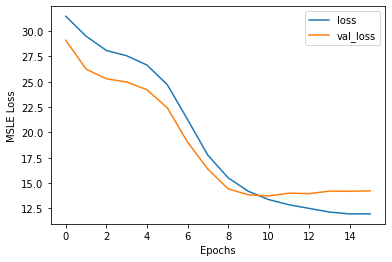

In [289]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()

In [274]:
s_test = pd.Series(test_df.to_numpy().flatten()).apply(lambda x: ' '.join(x)).values.reshape(-1, 1).tolist()
test = vectorize_layer(s_test)
test

<tf.Tensor: shape=(1000, 100), dtype=int64, numpy=
array([[ 18,  18,  58, ...,  21,  21,   7],
       [ 18,  58,  21, ...,  21,   7,  66],
       [ 58,  21,  21, ...,   7,  66,   8],
       ...,
       [ 13,  18,   7, ...,  35,   7, 129],
       [ 18,   7,  47, ...,   7, 129, 127],
       [  7,  47,  16, ..., 129, 127, 126]], dtype=int64)>

In [290]:
def find_threshold(model, x_train):
    reconstructions = model.predict(x_train)
    # provides losses of individual instances
    reconstruction_errors = tf.keras.losses.mae(reconstructions, x_train)
    # threshold for anomaly scores
    threshold = np.mean(reconstruction_errors.numpy()) + np.std(reconstruction_errors.numpy())
    return threshold

def get_predictions(model, x_test, threshold):
    predictions = model.predict(x_test)
    # provides losses of individual instances
    errors = tf.keras.losses.mae(predictions, x_test)
    # 0 = anomaly, 1 = normal
    anomaly_mask = pd.Series(errors) > threshold
    preds = anomaly_mask.map(lambda x: 0.0 if x == True else 1.0)
    return preds

In [291]:
threshold = find_threshold(model, test)
print(f"Threshold: {threshold}")
predictions = get_predictions(model, test, threshold)
accuracy_score(predictions, y_test)

Threshold: 16.59912089482906


0.183

In [292]:
get_metrics(y_test, predictions)

Acc: 0.183
Precision: 0.09854423292273236
Recall: 0.88
F1 Score: 0.17724068479355487
Final Grade: 55.25573770491803/70


55.25573770491803